In [1]:
# Project 2 : Rigid - body Dynamics

In [32]:
import math as m
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import special

In [33]:
#Task 1 - Jacobi elliptic functions

I1=0.8
I2=0.9
I3=1.0
w1=1.0
w2=0.0
w3=2.0
E=(I1*w1**2+I2*w2**2+I3*w3**2)/2
M=np.sqrt((I1*w1)**2+(I2*w2)**2+(I3*w3)**2)
k=((I2-I1)*(2*E*I3-M**2))/((I3-I2)*(M**2-2*E*I1))
c1=[]
c2=[]
c3=[]
c4=[]
t=range(0,100)


In [34]:
def T(t):
     return t*np.sqrt((I3-I2)*(M**2-2*E*I1)/(I1*I2*I3))
    

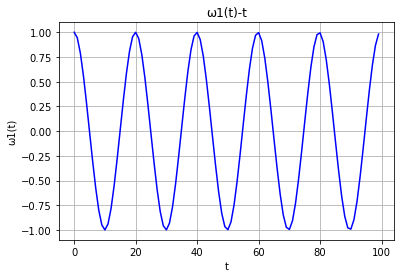

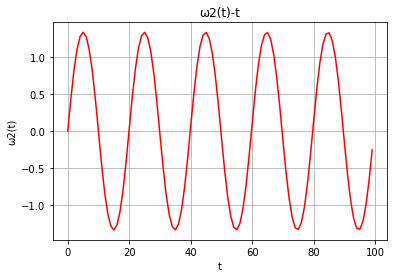

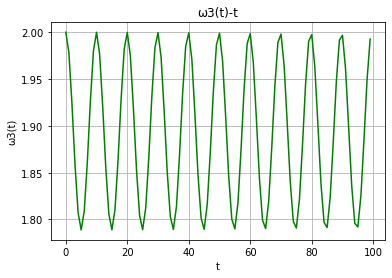

In [35]:
def W1(t):
    
    return np.sqrt((2*E*I3-M**2)/(I1*(I3-I1)))*special.ellipj(T(t),k)[1]

def W2(t):
    
    return np.sqrt((2*E*I3-M**2)/(I2*(I3-I2)))*special.ellipj(T(t),k)[0]

def W3(t):
    
    return np.sqrt((M**2-2*E*I1)/(I3*(I3-I1)))*special.ellipj(T(t),k)[2]   

for i in t:
    c1.append(W1(i))
    c2.append(W2(i))
    c3.append(W3(i))
    c4.append(i)
    
plt.plot(t,c1,'-b')
plt.title('ω1(t)-t')
plt.xlabel('t')
plt.ylabel('ω1(t)')
plt.grid()
plt.show()

plt.plot(t,c2,'-r')
plt.title('ω2(t)-t')
plt.xlabel('t')
plt.ylabel('ω2(t)')
plt.grid()
plt.show()

plt.plot(t,c3,'-g')
plt.title('ω3(t)-t')
plt.xlabel('t')
plt.ylabel('ω3(t)')
plt.grid()
plt.show()

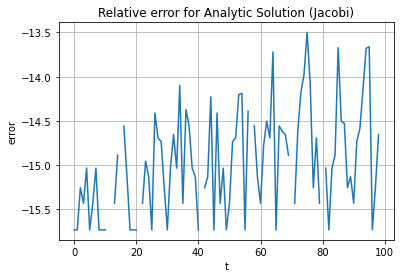

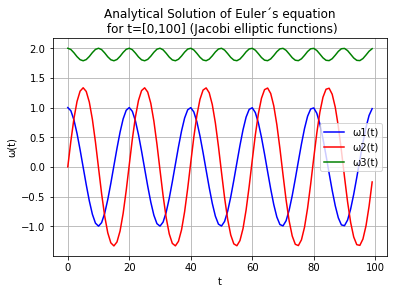

In [36]:
I1=0.8
I2=0.9
I3=1.0
w1=1
w2=0
w3=2
t=range(100)
E_list=[]
error_list=[]
E1o=(I1*w1**2+I2*w2**2+I3*w3**2)/2

def E1(t):
     return 0.5*(I1*(c1[i])**2+I2*(c2[i])**2+I3*(c3[i])**2)

def error(t):
     return np.log10(np.abs(((E1(t)-E1o)/E1o)))

for  i in t:
     E_list.append(E1(i))
        
for i in t:
    if E_list[i]!=E1o:
        error_list.append(error(i))
    else:
        error_list.append(np.nan)
        
# Από το διάγραμμα του σχετικού σφάλματος παρατηρούμε ότι προσεγγίζει την ακρίβεια μηχανής (10^(-16)) και επομένως
# η αναλυτική λύση των εξισώσεων του Euler έχει μεγάλη ακρίβεια.

plt.plot(t,error_list)
plt.title('Relative error for Analytic Solution (Jacobi)')
plt.xlabel('t')
plt.ylabel('error')
plt.grid()
plt.show()

# Σύμφωνα με τα διαγράμματα των λύσεων ω1(t), ω2(t), ω3(t) βλέπουμε ότι η συμπεριφορά των κυμάτων 
# που περιγράφουν τις λύσεις έχουν περιοδική μορφή.

plt.plot(c4,c1,'-b')
plt.plot(c4,c2,'-r')
plt.plot(c4,c3,'-g')
plt.title('Analytical Solution of Euler΄s equation\n for t=[0,100] (Jacobi elliptic functions)')
plt.xlabel('t')
plt.ylabel('ω(t)')
plt.legend(["ω1(t)", "ω2(t)","ω3(t)"])
plt.grid()
plt.show()

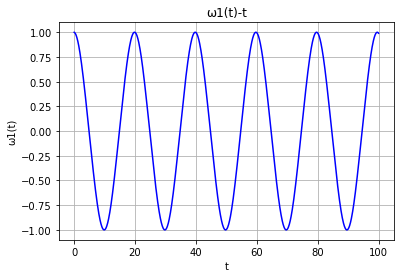

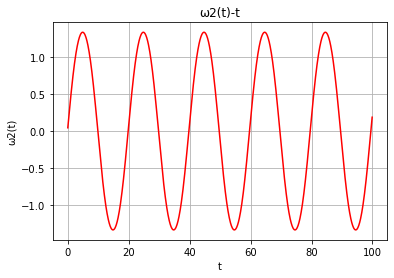

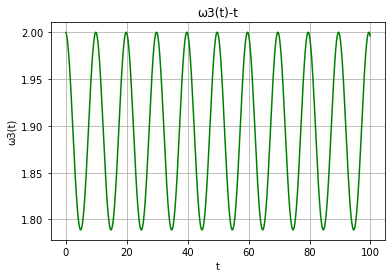

In [26]:
# Task 2 - Runge-Kutta 4th order

%reset -f
import math as m
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import special

I1=0.8
I2=0.9
I3=1.0

w1_1=[]
w2_2=[]
w3_3=[]

w11=1
w22=0
w33=2

E1=(I1*w11**2+I2*w22**2+I3*w33**2)/2
E_list=[]
error_list=[]


def f1(w22,w33):
    return ((I2-I3)*w22*w33)/(I1)

def f2(w11,w33):
    return ((I3-I1)*w33*w11)/(I2)

def f3(w11,w22):
    return ((I1-I2)*w11*w22)/(I3)
    

h = 0.1   
n =np.arange(0,100,0.1)


for i in n:
    
    k1 = h*f1(w22,w33)
    r1 = h*f2(w11,w33)
    s1 = h*f3(w11,w22)
    
    k2 = h*f1(w22 + r1*0.5,w33 + s1*0.5)
    r2 = h*f2(w11 + k1*0.5,w33 + s1*0.5)
    s2 = h*f3(w11 + k1*0.5,w22 + r1*0.5)
    
    k3 = h*f1(w22 + r2*0.5,w33 + s2*0.5)
    r3 = h*f2(w11 + k2*0.5,w33 + s2*0.5)
    s3 = h*f3(w11 + k2*0.5,w22 + r2*0.5)
    
    k4 = h*f1(w22 + r3,w33 + s3)
    r4 = h*f2(w11 + k3,w33 + s3)
    s4 = h*f3(w11 + k3,w22 + r3)
    
    w11=(w11 + (1/6)*(k1 + 2*k2 + 2*k3 + k4))
    w22=(w22 + (1/6)*(r1 + 2*r2 + 2*r3 + r4))
    w33=(w33 + (1/6)*(s1 + 2*s2 + 2*s3 + s4))
    
    E=(I1*w11**2+I2*w22**2+I3*w33**2)/2
    error=np.log10(abs(((E-E1)/E1)))
    
    w1_1.append(w11)  
    w2_2.append(w22)
    w3_3.append(w33)
    
    E_list.append(E)
    error_list.append(error)
    

    
plt.plot(n,w1_1, '-b')
plt.title('ω1(t)-t')
plt.xlabel('t')
plt.ylabel('ω1(t)')
plt.grid()
plt.show()

plt.plot(n,w2_2,'-r')
plt.title('ω2(t)-t')
plt.xlabel('t')
plt.ylabel('ω2(t)')
plt.grid()
plt.show()

plt.plot(n,w3_3, '-g') 
plt.title('ω3(t)-t')
plt.xlabel('t')
plt.ylabel('ω3(t)')
plt.grid()
plt.show()


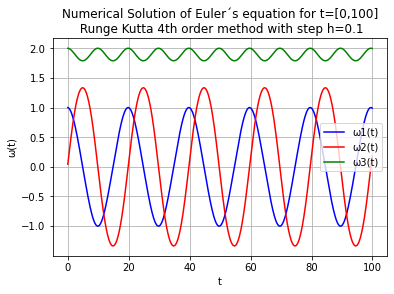

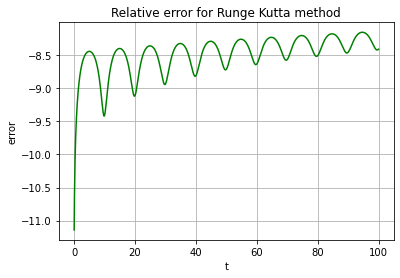

In [27]:
plt.plot(n,w1_1, '-b')
plt.plot(n,w2_2,'-r')
plt.plot(n,w3_3, '-g') 
plt.legend(["ω1(t)", "ω2(t)","ω3(t)"])
plt.title('Numerical Solution of Euler΄s equation for t=[0,100]\n Runge Kutta 4th order method with step h=0.1')
plt.xlabel('t')
plt.ylabel('ω(t)')
plt.grid()
plt.show()

plt.plot(n,error_list, '-g') 
plt.title('Relative error for Runge Kutta method')
plt.xlabel('t')
plt.ylabel('error')
plt.grid()
plt.show()

# Από το διάγραμμα του σχετικού σφάλματος παρατηρούμε ότι η ακρίβεια έχει μειωθεί σε σχέση με την αναλυτική λύση του Task 1, 
# γεγονός που οφείλεται στο βήμα h=0.1 το οποίο είναι μεγάλο,
# και επίσης δεν παρουσιάζει κάποια συνοχή καθώς μεγαλώνει με την πάροδο του χρόνου,
# όμως από τα διαγράμματα των λύσεων βλέπουμε ότι οι λύσεις της μεθόδου  Runge-Kutta 4ης τάξης συμφωνούν με τα αποτελέσματα 
# της αναλυτικής λύσης.

In [28]:
# Task 3 - Splitting method

%reset -f
import math as m
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import special

I1=0.8
I2=0.9
I3=1.0
w1=1
w2=0
w3=2

def Rx(th):
    return np.array([[1,0,0],[0,np.cos(th),np.sin(th)],[0,-np.sin(th),np.cos(th)]])

def Ry(th):
    return np.array([[np.cos(th),0,-np.sin(th)],[0,1,0],[np.sin(th),0,np.cos(th)]])

def Rz(th):
    return np.array([[np.cos(th),np.sin(th),0],[-np.sin(th),np.cos(th),0],[0,0,1]])



In [29]:
def FHM1(t,w1,w2,w3):
   
    return np.matmul(Rx(w1*t),[I1*w1,I2*w2,I3*w3])

def FHM2(t,w1,w2,w3):
    
    return np.matmul(Ry(w2*t),[I1*w1,I2*w2,I3*w3])
    
def FHM3(t,w1,w2,w3):
  
    return np.matmul(Rz(w3*t),[I1*w1,I2*w2,I3*w3])

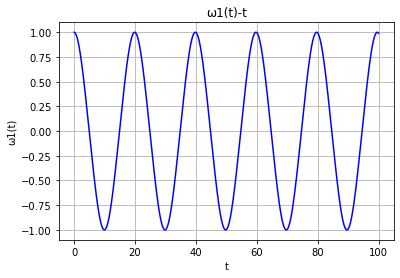

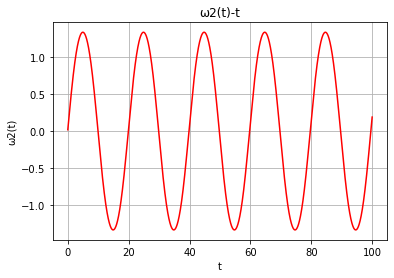

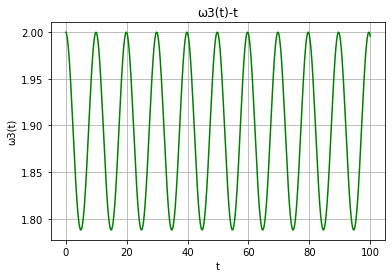

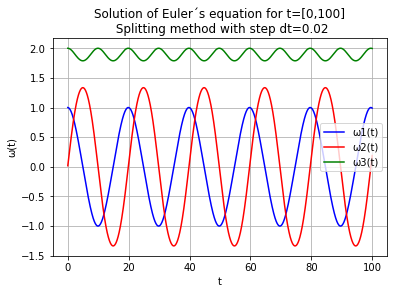

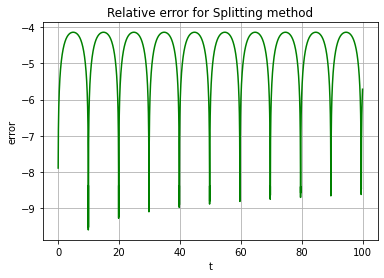

In [31]:
n=np.arange(0,100,0.02)
dt=0.02
w1_1=[]
w2_2=[]
w3_3=[]
E1=(I1*w1**2+I2*w2**2+I3*w3**2)/2
E_list=[]
error_list=[]

for i in n:
    
    
    d=FHM1(dt/2,w1,w2,w3)
    d=FHM2(dt/2,d[0]/I1,d[1]/I2,d[2]/I3)
    d=FHM3(dt,d[0]/I1,d[1]/I2,d[2]/I3)
    d=FHM2(dt/2,d[0]/I1,d[1]/I2,d[2]/I3)
    d=FHM1(dt/2,d[0]/I1,d[1]/I2,d[2]/I3)
    
    w1=d[0]/I1
    w2=d[1]/I2
    w3=d[2]/I3
    
    E=(I1*w1**2+I2*w2**2+I3*w3**2)/2
    error=np.log10(abs(((E-E1)/E1)))
    
    w1_1.append(w1)
    w2_2.append(w2)
    w3_3.append(w3)
    
    E_list.append(E)
    error_list.append(error)

plt.plot(n,w1_1, '-b')
plt.title('ω1(t)-t')
plt.xlabel('t')
plt.ylabel('ω1(t)')
plt.grid()
plt.show()

plt.plot(n,w2_2,'-r')
plt.title('ω2(t)-t')
plt.xlabel('t')
plt.ylabel('ω2(t)')
plt.grid()
plt.show()
    
plt.plot(n,w3_3, '-g')
plt.title('ω3(t)-t')
plt.xlabel('t')
plt.ylabel('ω3(t)')
plt.grid()
plt.show()

plt.plot(n,w1_1, '-b')   
plt.plot(n,w2_2,'-r')
plt.plot(n,w3_3, '-g') 
plt.legend(["ω1(t)", "ω2(t)","ω3(t)"])
plt.title('Solution of Euler΄s equation for t=[0,100]\n Splitting method with step dt=0.02')
plt.xlabel('t')
plt.ylabel('ω(t)')
plt.grid()
plt.show()    
    
plt.plot(n,error_list, '-g') 
plt.title('Relative error for Splitting method')
plt.xlabel('t')
plt.ylabel('error')
plt.grid()
plt.show()

# Από το διάγραμμα του σχετικού σφάλματος παρατηρούμε ότι η ακρίβεια έχει μειωθεί σε σχέση με την αναλυτική λύση του Task 1 
# και σε σχέση με την ακρίβεια του Task 2 παρόλο που το βήμα dt=0.02 έχει μειωθεί σε σχέση με το βήμα του Task 2.
# Από τα διαγράμματα των λύσεων βλέπουμε ότι οι λύσεις της μεθόδου Splitting συμφωνούν και με τα αποτελέσματα της μεθόδου
# Runge-Kutta 4ης τάξης καθώς επίσης και με τα αποτελέσματα της αναλυτικής λύσης.